In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

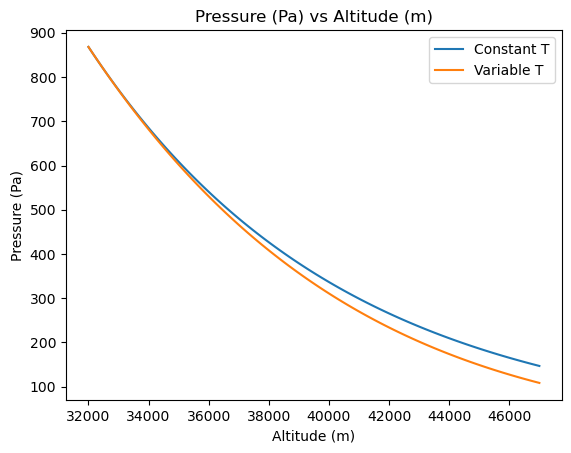

In [17]:
T0, p0 = 288.65, 868.019
h0 = 32000
R = 287
g = 9.81
h = sym.symbols('h')
T = T0 - 0.0028*(h-h0)
pf = p0*(sym.exp(-g/(R*T0)*(h-h0)))

pfT = p0*(sym.exp(-g/(R*T)*(h-h0)))

#need to plot the equation
p = sym.lambdify(h, pf, modules='numpy')
pf = sym.lambdify(h, pfT, modules='numpy')
h = np.linspace(32000, 47000, 100)
p = p(h)
pf = pf(h)
p1 = plt.plot(h, p)
p2 = plt.plot(h, pf)
plt.legend(['Constant T', 'Variable T'])
plt.title('Pressure (Pa) vs Altitude (m)')
plt.xlabel('Altitude (m)')
plt.ylabel('Pressure (Pa)')
plt.show()


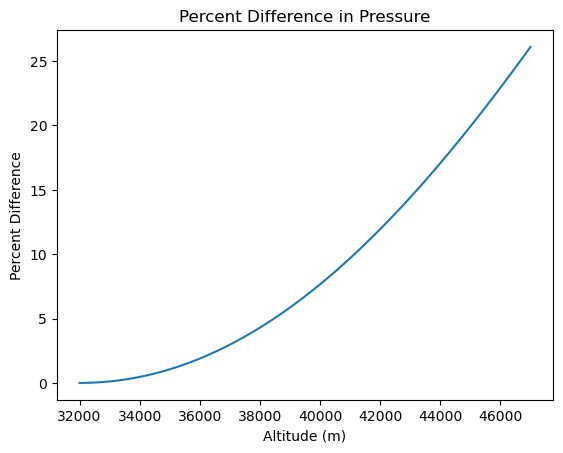

In [18]:
n = np.abs(1 - pf/p) * 100
plt.plot(h, n)
plt.title('Percent Difference in Pressure')
plt.xlabel('Altitude (m)')
plt.ylabel('Percent Difference')
plt.show()


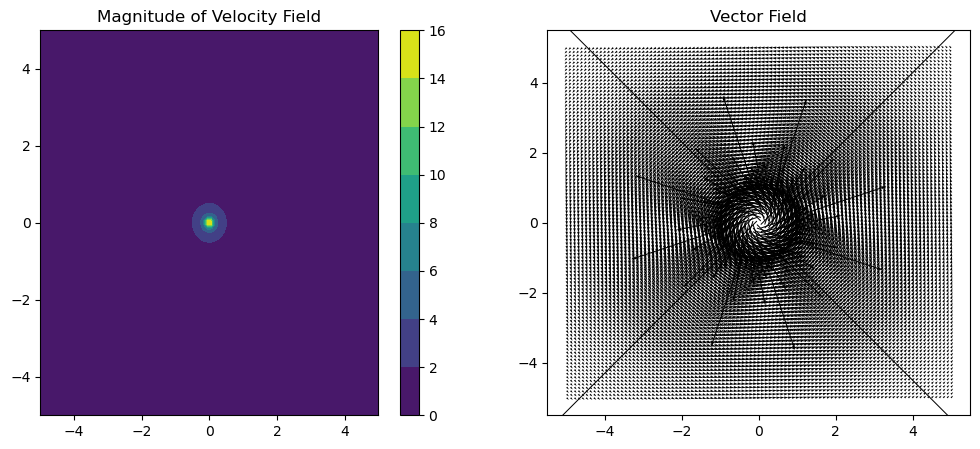

In [30]:
def vector_field(x, y, K):
    u = -K * y / (x**2 + y**2)
    v = K * x / (x**2 + y**2)
    return u, v

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
K = 1.0

u, v = vector_field(X, Y, K)

mag = np.sqrt(u**2 + v**2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(X, Y, mag)
plt.colorbar()
plt.title('Magnitude of Velocity Field')

plt.subplot(1, 2, 2)
plt.quiver(X, Y, u, v, scale=20)
plt.title('Vector Field')

plt.show()
